In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from sklearn import linear_model, metrics

                                                        smiles       mz  \
CC(C)CC1NC(=O)C(C)NC(=O)C(=C)N(C)C(=O)CCC(NC(=O...  289.286377  981.162   
NaN                                                 295.545288  981.162   
NaN                                                 298.489624  981.162   
NaN                                                 317.324951  981.162   
NaN                                                 319.655945  981.162   
...                                                        ...      ...   
NaN                                                 998.175903  786.689   
NaN                                                 998.381592  786.689   
NaN                                                 998.490723  786.689   
NaN                                                 998.799988  786.689   
NaN                                                 999.381165  786.689   

                                                         mw  alogp   hba  \
CC(C)CC1NC(=O)C(C)NC(=O

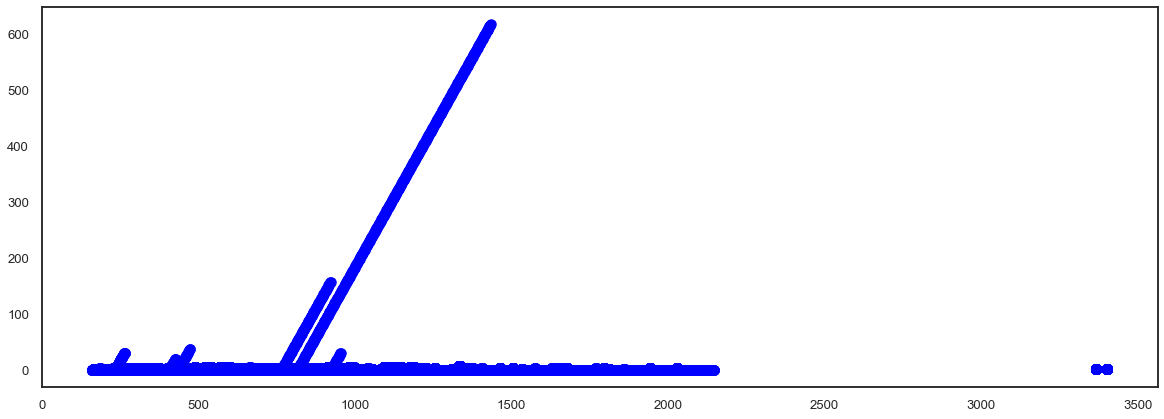

997818 997818
[733504 733505 733506 733507 733508 733509 733510 733511 733512 733513
 733514 733515 744128 744129 744130 744131 744132 744133 744134 744135
 744136 744137 744138 744139 744140 744141 744142 744143 744144 744145
 744146 744147 744148 744149 744150 744151 744152 744153 744154 744155
 744156 744157 744158 744159 744160 744161 744162 744163 744164 744165
 744166 744167 744168 744169 744170 744171 744172 744173 744174 744175
 744176 744177 744178 744179 744180 744181 744182 744183 744184 744185
 744186 744187 744188 744189 744190 744191 744192 744193 744194 744195
 744196 744197 744198 744199 744200 744201 744202 744203 744204 744205
 744206 744207 744208 744209 744210 744211 744212 744213 744214 744215
 744216 744217 744218 744219 744220 744221 744222 744223 744224 744225
 744226 744227 744228 744229 744230 744231 744232 744233 744234 744235
 744236 744237 744238 744239 744240 744241 744242 744243 744244 744245
 744246 744247 744248 744249 744250 744251 744252 744253 744254

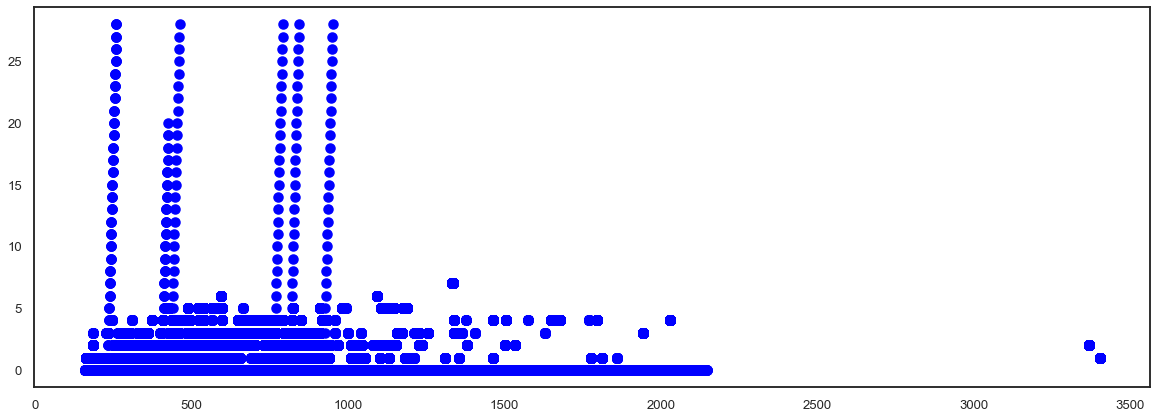

In [3781]:
import decimal
from decimal import Decimal
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.kernel_ridge import KernelRidge
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
np.set_printoptions(suppress=True)

from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
mydf=pd.read_csv('GNPStrainqed',  sep='\t')
mydf.columns=['smiles','mz','mw','alogp','hba','hbd', 'psa', 'rotb', 'arom', 'alerts', 'qed', 'fCSP3', 'logPow', 'solubility', 'bioavailability']

#mydf.columns=['molecule number', 'FDA approved name', 'mz', 'smiles', 'mw', 'alogp', 'hba', 'hbd', 'psa', 'rotb', 'arom', 'alerts', 'qed', 'fraction sp3 hybridized carbons']

# Initialize lists and set random seed
print(mydf)
list_x = mydf['mz']

list_x=list_x.astype(float)
list_x=list_x.to_numpy().reshape(-1,1)
list_y = mydf['arom'].to_numpy().reshape(-1,1)
list_x_pred = []
list_y_real = []

np.set_printoptions(precision = 3, suppress = True)

list_y = np.nan_to_num(list_y)

list_x = np.nan_to_num(list_x)

        
list_y=pd.DataFrame(list_y)
list_x=pd.DataFrame(list_x)
list_x.to_csv()
list_y.to_csv('myyvalues.csv')
print(list_y.min())
print(list_y.max())
list_ymean=list_y.mean()
list_ystd=list_y.std()

import matplotlib.pyplot as plt
plt.scatter(list_x, list_y, c ="blue")
 
# To show the plot
plt.show()


from scipy import stats
z = np.abs(stats.zscore(list_y)) 
threshold = 3
 
# Position of the outlier
outliers=np.where(z > 3)
print(len(list_x), len(list_y))
print(outliers[0])
print(len(outliers[0]))

list_x.drop(outliers[0],inplace = True)


list_y.drop(outliers[0],inplace = True)
print(len(list_x), len(list_y))

plt.scatter(list_x, list_y, c ="blue")
 
# To show the plot
plt.show()

In [3782]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [3783]:
# ####################
# Fit regression model
train_size = 100 # Change here to try different amounts of data
krr = GridSearchCV(KernelRidge(kernel='rbf',alpha=100),
                  param_grid={"gamma": np.logspace(-400, 400, 2)})

krr.fit(list_x[:train_size], list_y[:train_size])

print('Best gamma from CV: ',krr.best_params_)
print('Length scale =',1/np.sqrt(2*krr.best_params_['gamma']))
krr.score(list_x, list_y )

Best gamma from CV:  {'gamma': 0.0}
Length scale = inf


-0.7192443853873889

(0, 0)


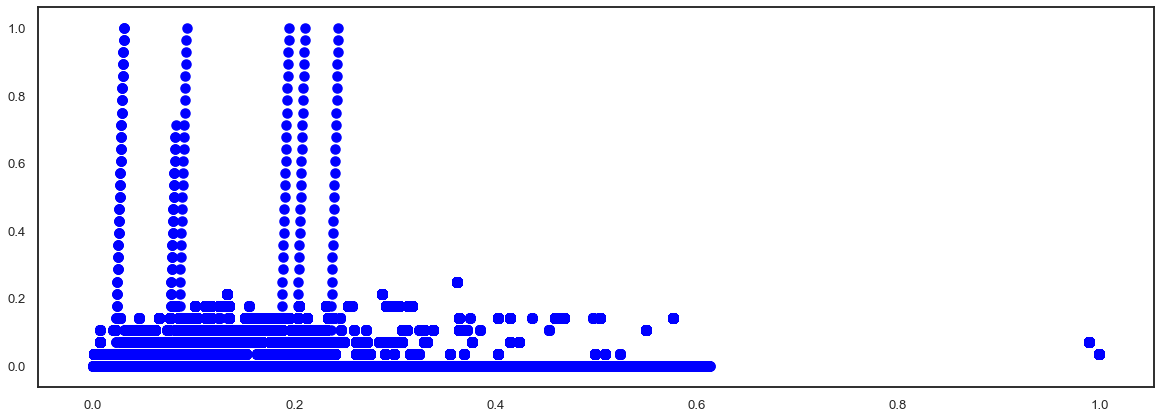

In [3784]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor

X_plot = np.linspace(0, 10, 1000)[:, None]
#scaler = preprocessing.StandardScaler()
scaler = MinMaxScaler()
def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)

    return (min_val, max_val)
print(minmax(list_y))
list_x = scaler.fit_transform(list_x)
list_y = scaler.fit_transform(list_y)
import matplotlib.pyplot as plt
plt.scatter(list_x, list_y, c ="blue")
 
# To show the plot
plt.show()



In [3785]:
xtrain, xtest, ytrain, ytest=train_test_split(list_x, list_y, test_size=0.15)

In [3786]:
import numpy as np
import pandas as pd

# For chapter 4
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For chapter 5
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import time

# For chapter 6
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV



In [3787]:
scaler = StandardScaler()

scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

trainX, testX, trainY, testY = train_test_split(xtrain, ytrain, test_size = 0.2)
testY

array([[0.   ],
       [0.143],
       [0.107],
       ...,
       [0.036],
       [0.   ],
       [0.   ]])

In [3788]:
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)


In [3789]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


In [3790]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings

In [3791]:
warnings.filterwarnings('ignore')

In [3792]:


%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)
 


In [3793]:
X_plot = np.linspace(0, 10, 1000)[:, None]
scaler = preprocessing.StandardScaler()
list_x = scaler.fit_transform(list_x)
list_y = np.nan_to_num(list_y)

list_x = np.nan_to_num(list_x)

list_y=np.asarray(list_y)

list_y=list_y.reshape(1, -1)
list_y = scaler.fit_transform(list_y)
list_y
n_samples, n_features = 1, 5
#krr = KernelRidge(alpha=5)
#krr.fit(list_x, list_y)
#predy=krr.predict(list_x)
#krr.score(list_y, predy )
ridge = linear_model.Ridge(alpha=4)
lasso = linear_model.Lasso(alpha=.1)

# ####################
# Fit regression model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(trainX, trainY)


#score
print(lasso_cv.score(trainX, trainY))
print(lasso_cv.score(testX, testY))


elastic = linear_model.ElasticNet(alpha=10, l1_ratio=.5, random_state=0, normalize=True)
lasso_lars = linear_model.LassoLars(alpha=.1)
bayesian_ridge = linear_model.BayesianRidge()
logistic = linear_model.LogisticRegression(solver='liblinear')
sgd = linear_model.SGDRegressor()

models = [ridge, lasso, elastic, lasso_lars, bayesian_ridge, logistic, sgd]



0.09732192601547274
0.09768658974653843


In [3794]:
trainX.reshape(1, -1)

ridge.fit(trainX, trainY, sample_weight=2)
lasso.fit(trainX, trainY)
elastic.fit(trainX, trainY)
lasso_lars.fit(trainX, trainY)
bayesian_ridge.fit(trainX, trainY, sample_weight=.02)
sgd.fit(trainX,trainY)

SGDRegressor()

In [3795]:
ypredridge=ridge.predict(testX)
ypredlasso=lasso.predict(testX)
ypredelastic=elastic.predict(testX)
ypredlassolars = lasso_lars.predict(testX)
ypredbayesian=bayesian_ridge.predict(testX)
sgdpredict=sgd.predict(testX)

In [3796]:
testY[~np.isfinite(testY)] = 0
ypredridge[~np.isfinite(ypredridge)] = 0


sgdscore = sgd.score(testY, ypredridge)
print("R-squared:", sgdscore)

R-squared: 0.024814050962893464


In [3797]:

score = bayesian_ridge.score(testY, ypredridge)
print("R-squared:", score)

R-squared: 0.024313370144050217


In [3798]:
lasso_lars.score(testY, ypredlassolars)



1.0

In [3799]:
elastic.score(testY, ypredelastic)

1.0

In [3800]:
lasso.score(testY, ypredlasso)



1.0

In [3801]:
ridge.score(testY, ypredridge)

0.024313579141003405

In [3802]:
trainX

array([[-0.618],
       [-1.095],
       [ 0.475],
       ...,
       [-0.823],
       [-0.206],
       [-0.354]])

In [3803]:
testY

array([[0.   ],
       [0.143],
       [0.107],
       ...,
       [0.036],
       [0.   ],
       [0.   ]])

In [3804]:
ypred=lasso.predict(testX)

#z = (x - u) / s
#where u is mean and s is standard dev


print( "Predicted values ", np.round( ypred[:10], 10 ) ) 



Predicted values  [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]


In [3805]:
df_preds = pd.DataFrame({'Actual': testY.squeeze(), 'Predicted': ypred.squeeze()})
print(df_preds)

          Actual  Predicted
0       0.000000   0.050243
1       0.142857   0.050243
2       0.107143   0.050243
3       0.071429   0.050243
4       0.000000   0.050243
...          ...        ...
169498  0.071429   0.050243
169499  0.000000   0.050243
169500  0.035714   0.050243
169501  0.000000   0.050243
169502  0.000000   0.050243

[169503 rows x 2 columns]


In [3806]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(testY, ypred)
mse = mean_squared_error(testY, ypred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.14f}')
print(f'Mean squared error: {mse:.14f}')
print(f'Root mean squared error: {rmse:.5f}')

Mean absolute error: 0.03816806703732
Mean squared error: 0.00213052662391
Root mean squared error: 0.04616


In [7625]:
mydf=pd.read_csv('compound217.csv', sep='\t')
mydf.columns=['molecule number','FDA approved name','mz', 'smiles', 'mw', 'alogp','hba', 'hbd', 'psa', 'rotb', 'arom', 'alerts', 'qed']
#mydf.columns=['molecule number', 'FDA approved name', 'mz', 'smiles', 'mw', 'alogp', 'hba', 'hbd', 'psa', 'rotb', 'arom', 'alerts', 'qed', 'fraction sp3 hybridized carbons']

# Initialize lists and set random seed
print(mydf)
list_x = mydf['mz']

list_x=list_x.astype(float)
list_x=list_x.to_numpy().reshape(-1,1)
list_y = mydf['arom'].to_numpy().reshape(-1,1)
list_x_pred = []
list_y_real = []

np.set_printoptions(precision = 5, suppress = True)

list_ya = np.nan_to_num(list_y)

list_xa = np.nan_to_num(list_x)

        
list_y=pd.DataFrame(list_y)

ymean=list_y.mean()
ystd=list_y.std()
print()

    molecule number FDA approved name        mz  \
0             217.0       bekanamycin  133.9000   
1               NaN               NaN  161.2000   
2               NaN               NaN  162.1000   
3               NaN               NaN  163.4000   
4               NaN               NaN  186.1000   
5               NaN               NaN  203.0000   
6               NaN               NaN  205.5000   
7               NaN               NaN  233.4000   
8               NaN               NaN  234.4000   
9               NaN               NaN  235.4000   
10              NaN               NaN  243.2000   
11              NaN               NaN  280.5000   
12              NaN               NaN  323.8000   
13              NaN               NaN  324.7000   
14              NaN               NaN  351.5000   
15              NaN               NaN  365.5000   
16              NaN               NaN  449.4000   
17              NaN               NaN  467.3000   
18              NaN            

In [7626]:

#scaler = preprocessing.StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler=preprocessing.MinMaxScaler()
list_x = scaler.fit_transform(list_x)
list_y = scaler.fit_transform(list_ya)


In [7627]:
ypredridge=ridge.predict(list_x)
ypredlasso=elastic.predict(list_x)

ypredelastic=elastic.predict(list_x)
ypredlassolars = lasso_lars.predict(list_x)
ypredbayesian=bayesian_ridge.predict(list_x)
sgdpredict=sgd.predict(list_x)

yhat = scaler.inverse_transform(ypredridge)
yhat


array([[0.05024],
       [0.05136],
       [0.0514 ],
       [0.05145],
       [0.05238],
       [0.05307],
       [0.05317],
       [0.05431],
       [0.05435],
       [0.05439],
       [0.05471],
       [0.05624],
       [0.05801],
       [0.05804],
       [0.05914],
       [0.05971],
       [0.06314],
       [0.06387],
       [0.06458],
       [0.05041]])

In [7628]:
ypredelastic

array([0.05024, 0.05024, 0.05024, 0.05024, 0.05024, 0.05024, 0.05024,
       0.05024, 0.05024, 0.05024, 0.05024, 0.05024, 0.05024, 0.05024,
       0.05024, 0.05024, 0.05024, 0.05024, 0.05024, 0.05024])

In [7629]:
#df_preds = pd.DataFrame({'Actual': list_y.squeeze(), 'Predicted': ypredlasso.squeeze()})
print(df_preds)

          Actual  Predicted
0       0.000000   0.050243
1       0.142857   0.050243
2       0.107143   0.050243
3       0.071429   0.050243
4       0.000000   0.050243
...          ...        ...
169498  0.071429   0.050243
169499  0.000000   0.050243
169500  0.035714   0.050243
169501  0.000000   0.050243
169502  0.000000   0.050243

[169503 rows x 2 columns]


In [7630]:
#z = (x - u) / s
#where u is mean and s is standard dev
myval=ypredlasso[0] * list_ystd + list_ymean

print(myval)


0    2.064078
dtype: float64


In [7631]:


.000815 * 5.681747e-17 + 0.149406

0.149406

In [7632]:
list_y.std()

0.0

In [7633]:
list_y.columns=['qed']

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [7634]:
list_y['qed']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [7635]:
print("std of arr : ", np.std(list_y['qed']))
  

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [7636]:
mydf=pd.read_csv('GNPStrainqed',  sep='\t')

In [7637]:
testY

array([[0.     ],
       [0.14286],
       [0.10714],
       ...,
       [0.03571],
       [0.     ],
       [0.     ]])

In [7638]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers as WeightRegularizer
from keras.optimizers import SGD
    #SKlearn for metrics and datasplits
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, roc_curve
    #Matplotlib for plotting
from matplotlib import pyplot as plt
from keras.regularizers import l2

    # In[11]:


    #Convert to Numpy arrays
from sklearn.preprocessing import StandardScaler
X = np.array(list(list_x))
y = list_y


# In[12]:


train_size=int(.7* X.shape[0])
X_train, X_test, y_train, y_test = X[0:train_size], X[train_size:],y[0:train_size],y[train_size:]



model = Sequential()
model.add(Dense(60, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.6, input_shape=(1,)))
model.add(Dense(60, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.6, input_shape=(1,)))
model.add(Dense(6, activation='sigmoid'))
    # In[34]:
model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer=SGD(lr=.0001, momentum=0.9, nesterov=True))
model.fit(X_train, y_train, epochs=1, batch_size=2)
    
    
y_pred = model.predict(X_test)
rms = (np.mean((y_test.reshape(-1,1) - y_pred)**2))**0.5
s = np.std(y_test -y_pred)
print("Neural Network RMS", rms)
   

7/7 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.2143
Neural Network RMS 0.5048299747211125


In [7639]:
predneuro=model.predict(list_x)

In [7640]:

yhat = scaler.inverse_transform(predneuro)

In [7641]:
predneuro

array([[0.49995, 0.49997, 0.49997, 0.49995, 0.49995, 0.49995],
       [0.50139, 0.50164, 0.50183, 0.49845, 0.49855, 0.50089],
       [0.50144, 0.5017 , 0.50189, 0.4984 , 0.4985 , 0.50092],
       [0.50151, 0.50178, 0.50198, 0.49833, 0.49844, 0.50097],
       [0.50273, 0.50321, 0.50355, 0.49711, 0.49729, 0.50176],
       [0.50364, 0.50427, 0.50472, 0.49621, 0.49644, 0.50235],
       [0.50377, 0.50442, 0.50489, 0.49608, 0.49631, 0.50244],
       [0.50528, 0.50617, 0.50682, 0.49459, 0.4949 , 0.50341],
       [0.50533, 0.50624, 0.50689, 0.49453, 0.49485, 0.50344],
       [0.50539, 0.5063 , 0.50696, 0.49448, 0.4948 , 0.50348],
       [0.50581, 0.50679, 0.5075 , 0.49406, 0.49441, 0.50375],
       [0.50782, 0.50913, 0.51008, 0.49207, 0.49252, 0.50505],
       [0.51015, 0.51184, 0.51307, 0.48976, 0.49033, 0.50656],
       [0.5102 , 0.5119 , 0.51313, 0.48971, 0.49029, 0.50659],
       [0.51164, 0.51358, 0.51498, 0.48828, 0.48894, 0.50753],
       [0.51239, 0.51446, 0.51595, 0.48753, 0.48823, 0.

In [7642]:
yhat.mean()

0.5025223